# Урок 6. Градиентный бустинг

In [0]:
AdaBoost

In [0]:
tree1, tree2, tree3

In [0]:
b0 = np.argmax([y == y1])

In [0]:
98% - class 0

In [0]:
2% - class 1

In [0]:
y_pred = 0

In [0]:
b0 = np.mean(y)

In [0]:
y_pred = b0

In [0]:
s - вектор сдвига

In [54]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [55]:
from sklearn.datasets import load_diabetes

In [56]:
X, y = load_diabetes(return_X_y=True)

In [57]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [6]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функицию.

In [7]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [8]:
def bias(y, z):
    return (y - z)

Реализуем функцию обучения градиентного бустинга.

In [9]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

Теперь обучим несколько моделей с разными параметрами и исследуем их поведение.

In [11]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [13]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, max_depth):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {len(trees)} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')
    
    mse_train = mean_squared_error(y_train, train_prediction)
    
    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {len(trees)} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    
    
    mse_test = mean_squared_error(y_test, test_prediction)
    
    return trees, max_depth, eta, mse_train, mse_test

In [37]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, max_depth=max_depth)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1263.2869283765992
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4418.5649604501605


(10, 3, 1, 1263.2869283765992, 4418.5649604501605)

Построим графики зависимости ошибки на обучающей и тестовой выборках от числа итераций.

In [17]:
import matplotlib.pyplot as plt

In [39]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

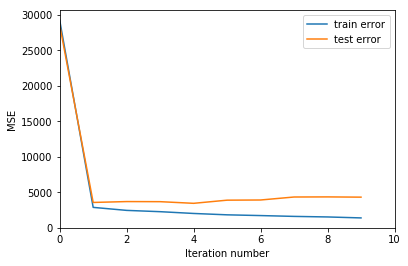

In [40]:
get_error_plot(n_trees, train_errors, test_errors)

Такой результат не является удовлетворительным

Увеличим число деревьев.

In [41]:
n_trees = 100
coefs = [1] * n_trees

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [42]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, max_depth=max_depth)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1.9177058702375884
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5061.919299088794


(100, 3, 1, 1.9177058702375884, 5061.919299088794)

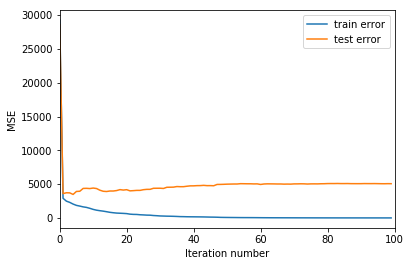

In [43]:
get_error_plot(n_trees, train_errors, test_errors)

Теперь попробуем уменьшить шаг.

In [44]:
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [45]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, max_depth=max_depth)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 969.5676182911466
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 2940.325900644082


(100, 3, 0.1, 969.5676182911466, 2940.325900644082)

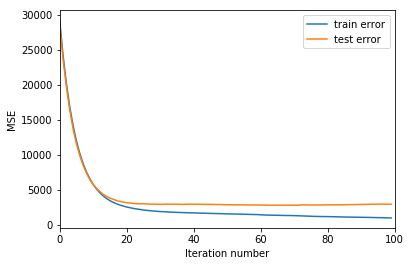

In [46]:
get_error_plot(n_trees, train_errors, test_errors)

Видим, что качество обучения улучшается.

Уменьшим шаг до 0.01.

In [47]:
eta = 0.01

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [48]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, max_depth=max_depth)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 6116.312033258966
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 6086.9668309281515


(100, 3, 0.01, 6116.312033258966, 6086.9668309281515)

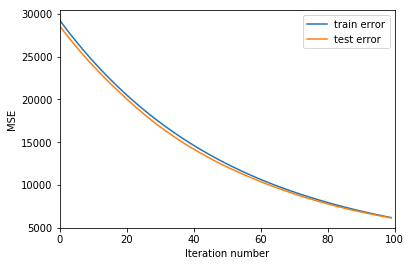

In [49]:
get_error_plot(n_trees, train_errors, test_errors)

При таком размере шага алгоритм сходится, но ему для достижения удовлетворительных показателей требуется большее количество итераций.

Вернемся к шагу 0.1 и попробуем увеличить глубину деревьев

In [50]:
eta = 0.1
max_depth = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [51]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, max_depth=max_depth)

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 90.73333008449674
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3317.397650174313


(100, 5, 0.1, 90.73333008449674, 3317.397650174313)

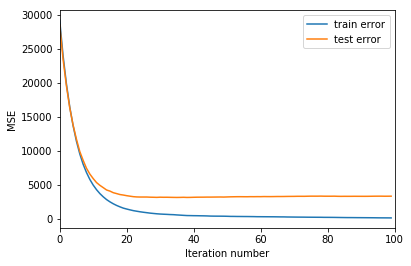

In [52]:
get_error_plot(n_trees, train_errors, test_errors)

### Домашнее задание

In [23]:
n_trees_list = [10, 100]
max_depth_list = [3, 5]
eta_list = [1, 0.1]

errors_list = []
params_list = []


for i in n_trees_list:
    for ii in max_depth_list:
        for iii in eta_list:
            trees, train_errors, test_errors = gb_fit(i, ii, X_train, X_test, y_train, y_test, coefs, iii)
            n_trees, max_depth, eta, mse_train, mse_test = evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, iii, ii)
            params_list.append(f'деревьев: {i}, глубина: {ii}, шаг: {iii}, train')
            errors_list.append(mse_train)
            params_list.append(f'деревьев: {i}, глубина: {ii}, шаг: {iii}, test')
            errors_list.append(mse_test)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1030.2785807342204
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4734.611619799557
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 5608.105436034509
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 7474.707572099744
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 97.84932133468112
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6156.255976232474
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 4669.839324032837
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 7418.989281953499
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1030.2785807342204
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4734.611619799557
Оши

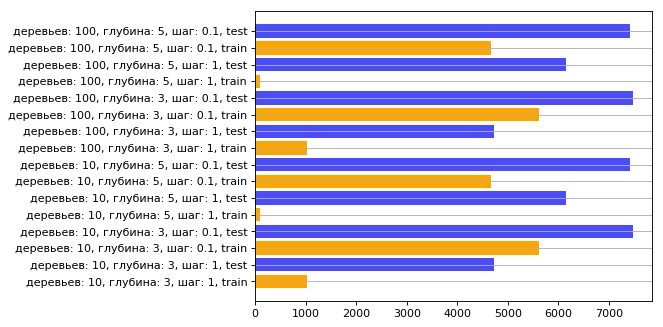

In [53]:
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

n = 1

for i in range(len(params_list)):
    if n % 2 != 0: 
        plt.barh(params_list[i], errors_list[i], color = 'orange')
    else:
        plt.barh(params_list[i], errors_list[i], color = 'blue', alpha = 0.7)
    n += 1

In [79]:
from sklearn.datasets import load_diabetes

In [89]:
X, y = load_diabetes(return_X_y=True)

In [90]:
# функция генерирует новые значения X и y
def get_new_X_y(X, y):
    
    new_X = X[get_new_indexes(X)]
    new_y = y[get_new_indexes(X)]
    
    return new_X, new_y

In [91]:
# функция возвращает 50% индексов
import random

def get_new_indexes(X):

    indexes = [i for i in range(len(X))]

    new_indexes = []
    
    random.shuffle(indexes)
    for i in range(int(len(X)/2)):
        new_indexes.append(indexes.pop())
        
    return new_indexes

In [92]:
n_trees_list = np.linspace(10, 200, 20)

errors_list = []
params_list = []

for i in n_trees_list:
    X_new, y_new = get_new_X_y(X, y)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, y_new, test_size=0.25)
    trees, train_errors, test_errors = gb_fit(int(i), 3, X_train, X_test, y_train, y_test, coefs, 1)
    n_trees, max_depth, eta, mse_train, mse_test = evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, 1, 3)
    params_list.append(f'деревьев: {i}')
    errors_list.append(mse_test)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1248.898835448787
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 10839.97295234966
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 946.2087592793629
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 1 на тестовой выборке: 8463.027680108704
Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 758.7971072565056
Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 1 на тестовой выборке: 8032.7898457764695
Ошибка алгоритма из 40 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1117.0795795795761
Ошибка алгоритма из 40 деревьев глубиной 3     с шагом 1 на тестовой выборке: 14117.136271915791
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 751.6318217871543
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тестовой выборке: 9074.371169351025
Ошибка алгор

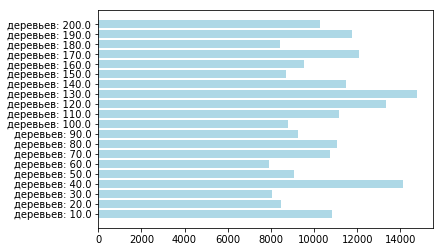

In [102]:
for i in range(len(params_list)):
    plt.barh(params_list[i], errors_list[i], color = 'lightblue')

## AdaBoost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

Разделим выборку на обучающую и тестовую

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Реализуем функцию подсчета ошибки

In [ ]:
def get_error(pred, y):
    return sum(pred != y) / len(y)

И сам алгоритм

In [ ]:
def adaboost(X, y, N):

    # Размер выборки
    n_objects = len(X)

    # Запишем количество классов в переменную
    n_classes = len(np.unique((y)))

    # Начальные веса деревьев
    w = np.ones(n_objects) / n_objects

    # Деревья с весами будем записывать в список
    models = []

    for n in range(N):
        # Зададим дерево и обучим его
        clf = DecisionTreeClassifier(max_depth=1)
        clf.fit(X, y, sample_weight=w)

        predictions = clf.predict(X)
        e = get_error(predictions, y)
        # отбросим дерево, если его ошибка больше 0.5
        # Запишем условие в общем виде (применимо к небинарным классификаторам)
        if e >= 1 - 1/n_classes: 
            break

        # Вычислим вес для дерева
        alpha = 0.5 * np.log((1 - e) / e)

        # Найдем индексы правильно классифицированных элементов
        match = predictions == y

        # Увеличим веса для неправильно классифицированных элементов
        w[~match] *= np.exp(alpha)

        # Нормализуем веса
        w /= w.sum()

        # Добавим дерево с весом в список
        models.append((alpha, clf))
    
    return models

Обучим алгоритм из 50 деревьев

In [ ]:
N = 50

models = adaboost(X_train, y_train, N)

Теперь осуществим предсказание

In [ ]:
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
    # вначале обозначим предсказание нулевым массивом
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
        # Для каждого предсказания будем прибавлять alpha к
        # элементу с индексом предсказанного класса
        y_pred[range(n_objects), prediction] += alpha
    
    # выберем индексы с максимальными суммарными весами -
    # получим предсказанные алгоритмом классы
    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')

In [ ]:
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

Построим графики зависимости ошибки от количества базовых алгоритмов в ансамбле.

In [ ]:
train_errors = []
test_errors = []

for n in range(1, 31):
    mods = adaboost(X_train, y_train, n)
    train_errors.append(get_error(predict(X_train, mods), y_train))
    test_errors.append(get_error(predict(X_test, mods), y_test))

In [ ]:
x = list(range(1, 31))

plt.xlim(0, 30)
plt.plot(x, train_errors, label='train errors')
plt.plot(x, test_errors, label='test errors')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')